In [15]:
from src import *

In [16]:
survey = pd.read_excel('./data/raw/NARIG_Survey.xlsx', usecols='A:EG')
column_names = pd.read_json('./data/processed/json/column_names.json', typ='series')

survey.rename(columns=column_names, inplace=True)
survey.replace(replace_map, inplace=True)
survey.replace(ordinal_map, inplace=True)

survey['age'] = survey['age'].replace(0, np.nan)
survey['gender'] = survey['gender'].str.split().str[-1]

orig_col_order = list(survey.columns)

demographic_cols = survey.columns[:12].tolist()
attitude_cols = survey.columns[12:20].tolist()
knowledge_cols = survey.columns[20:25].tolist()
practice_cols = survey.columns[25:30].tolist()
# vc_performance_cols = survey.columns[30:-6].tolist()
performance_cols = survey.columns[-6:].tolist()

value_chains = list(survey['value_chain'].unique())

narig_dfs = {vc: survey[survey['value_chain'] == vc].dropna(axis=1, how='all') for vc in value_chains}

for k, v in narig_dfs.items():
    v.columns = v.columns.str.replace('_\d', '', regex=True)
    v.dropna(axis=0, inplace=True)

narig_dfs['survey_df'] = pd.concat(narig_dfs.values(), ignore_index=True)
narig_dfs['survey_df'] = narig_dfs['survey_df'][[col for col in orig_col_order if col in narig_dfs['survey_df'].columns]]

narig_dfs['survey_df'] = create_composite_feature(narig_dfs['survey_df'], attitude_cols, 'attitude', drop_features=False)
narig_dfs['survey_df'] = create_composite_feature(narig_dfs['survey_df'], knowledge_cols, 'knowledge', drop_features=False)
narig_dfs['survey_df'] = create_composite_feature(narig_dfs['survey_df'], practice_cols, 'practice', drop_features=False)
narig_dfs['survey_df'] = create_composite_feature(narig_dfs['survey_df'], performance_cols, 'project_performance', drop_features=False)

for k, v in narig_dfs.items():
    for col in v.select_dtypes('object').columns:
        v[col] = v[col].astype('category')
    for col in v.select_dtypes('float').columns:
        if v[col].apply(float.is_integer).all():
            v[col] = v[col].astype(int)
    # print(k)

narig_dfs['survey_df']

C:\Users\kisee\AppData\Local\Temp\ipykernel_18080\3552230060.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  survey.replace(ordinal_map, inplace=True)


,ward,gender,age,education,monthly_income,household_size,family_head,value_chain,vc_experience,project_skepticism,...,enterprise_profitability_increase,farm_productivity_increase,timely_implementation,new_income_streams,job_creation_increase,project_inclusivity,attitude,knowledge,practice,project_performance
0,Tulimani,Male,64,Secondary,30000,3,Yes,Tomato,40,5,...,5,5,4,5,5,5,5.000,4.6,162.6,4.833333
1,Tulimani,Male,67,Secondary,20000,4,Yes,Tomato,20,5,...,5,5,5,5,5,5,5.000,4.8,34.4,5.000000
2,Tulimani,Female,33,Primary,5000,3,No,Tomato,5,5,...,5,5,5,5,5,5,5.000,4.8,8.6,5.000000
3,Tulimani,Female,73,Primary,800,6+,No,Tomato,2,5,...,5,5,4,5,5,5,5.000,4.8,6.6,4.833333
4,Tulimani,Male,71,Secondary,10000,5,Yes,Tomato,5,5,...,5,5,5,5,5,5,5.000,5.0,52.4,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,Mtito Andei,Female,85,Primary,16000,6+,No,Indigenous chicken,18,3,...,4,4,4,4,4,4,4.125,3.6,3.0,4.000000
331,Mtito Andei,Female,54,Primary,14000,6+,Yes,Indigenous chicken,15,3,...,4,4,4,4,4,4,4.125,3.6,3.5,4.000000
332,Mtito Andei,Female,60,Primary,16000,6+,Yes,Indigenous chicken,20,3,...,4,4,4,4,4,4,4.000,3.6,3.5,4.000000
333,Mtito Andei,Female,62,Primary,4500,5,No,Indigenous chicken,6,5,...,5,5,5,5,5,5,5.000,5.0,5.0,5.000000


In [17]:
# PRint value with less than 1
for col in narig_dfs['survey_df'].loc[:, 'vc_experience':].columns:
    print(col)
    print(narig_dfs['survey_df'][col].value_counts(normalize=True, dropna=False))
    print()

vc_experience
vc_experience
5     0.268657
4     0.244776
10    0.065672
3     0.062687
6     0.059701
15    0.047761
20    0.047761
2     0.035821
8     0.035821
7     0.026866
1     0.017910
25    0.014925
9     0.011940
18    0.008955
30    0.005970
19    0.005970
12    0.005970
14    0.002985
35    0.002985
16    0.002985
50    0.002985
40    0.002985
17    0.002985
43    0.002985
27    0.002985
26    0.002985
13    0.002985
11    0.002985
Name: proportion, dtype: float64

project_skepticism
project_skepticism
5    0.519403
4    0.328358
3    0.104478
2    0.047761
Name: proportion, dtype: float64

adequate_consultation
adequate_consultation
4    0.522388
5    0.471642
3    0.005970
Name: proportion, dtype: float64

project_acceptance
project_acceptance
4    0.585075
5    0.402985
3    0.011940
Name: proportion, dtype: float64

satisfactory_training
satisfactory_training
5    0.498507
4    0.498507
3    0.002985
Name: proportion, dtype: float64

project_success_optimism
project_suc

C:\Users\kisee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


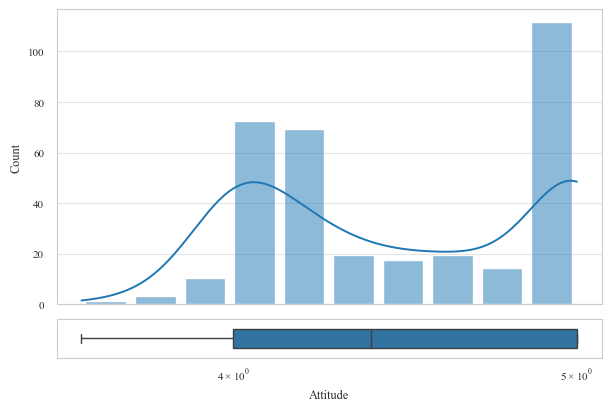

C:\Users\kisee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


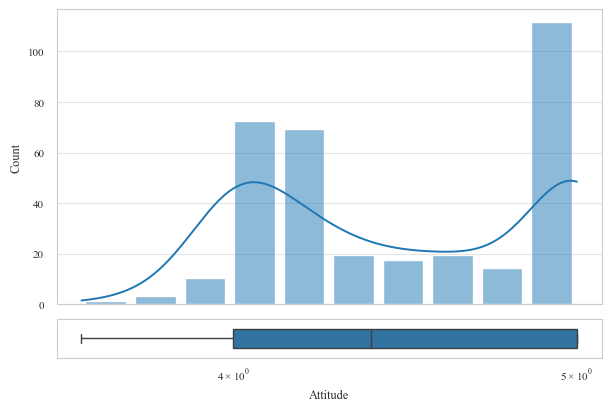

C:\Users\kisee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


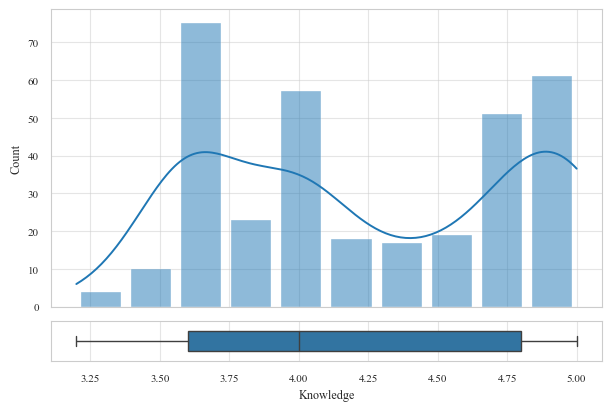

C:\Users\kisee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


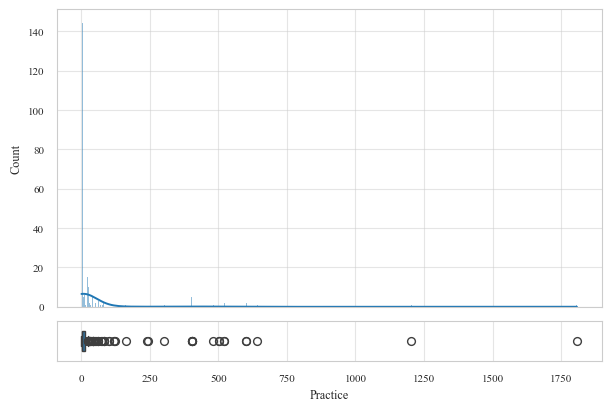

C:\Users\kisee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


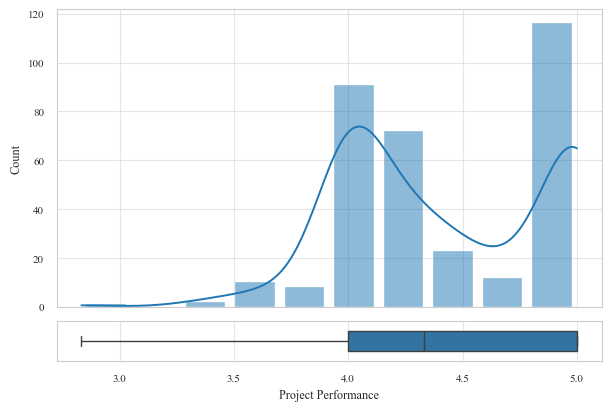

In [18]:
def plot_distribution(dataframe, feature, by=None, histyle='dodge', violin=False, fh=4, hr=1, log=False, **kwargs):
    """
    Plot the distribution of a feature; histogram and KDE, boxplot/violin plot.
    
    Parameters
    ----------
    dataframe : pandas.DataFrame
        The dataframe containing the feature.
    feature : str
        The name of the feature.
    by : str, default None
        The name of the feature to group by.
    histyle : str, default 'dodge'
        The style of the histogram. Options are 'dodge' or 'stack'.
    violin : bool, default False
        Whether to plot a violin plot instead of a boxplot.
    fh : int, default 5
        The height of the figure.
    hr : int, default 1
        The height of the boxplot/violin plot axes.        
    **kwargs : dict
        Keyword arguments to pass to the seaborn plots.
    
    Returns
    -------
    fig : matplotlib.figure.Figure
        The figure containing the plots.
    ax : matplotlib.axes.Axes
        The axes containing the plots.
    """
    fig, ax = plt.subplots(2, 1, figsize=(6, fh),
                           gridspec_kw={'height_ratios': [7.5, hr]},
                           sharex=True)
    sns.histplot(data=dataframe, x=feature, kde=True, hue=by, multiple=histyle, ax=ax[0], shrink=0.8, log_scale=log, **kwargs)
    if violin:
        sns.violinplot(data=dataframe, x=feature, y=by, ax=ax[1], **kwargs)
    else:
        sns.boxplot(data=dataframe, x=feature, y=by, ax=ax[1], width=0.5, **kwargs)
    ax[1].set_ylabel('')
    ax[1].set_xlabel(feature.replace('_', ' ').title())
    return fig, ax

# for col in narig_dfs['survey_df'].loc[:, 'vc_experience':].columns:
#     print(col)
#     fig, ax = plot_distribution(narig_dfs, col, by='value_chain', histyle='dodge', violin=True, fh=4, hr=1, log=False)
#     plt.show()
fig, ax = plot_distribution(narig_dfs['survey_df'], 'attitude', histyle='dodge', violin=False, fh=4, hr=1, log=True)
plt.show()
fig, ax = plot_distribution(narig_dfs['survey_df'], 'attitude', histyle='dodge', violin=False, fh=4, hr=1, log=True)
plt.show()

fig, ax = plot_distribution(narig_dfs['survey_df'], 'knowledge', histyle='dodge', violin=False, fh=4, hr=1, log=False)
plt.show()

fig, ax = plot_distribution(narig_dfs['survey_df'], 'practice', histyle='dodge', violin=False, fh=4, hr=1, log=False)
plt.show()

fig, ax = plot_distribution(narig_dfs['survey_df'], 'project_performance')
plt.show()

<Axes: xlabel='attitude', ylabel='Density'>

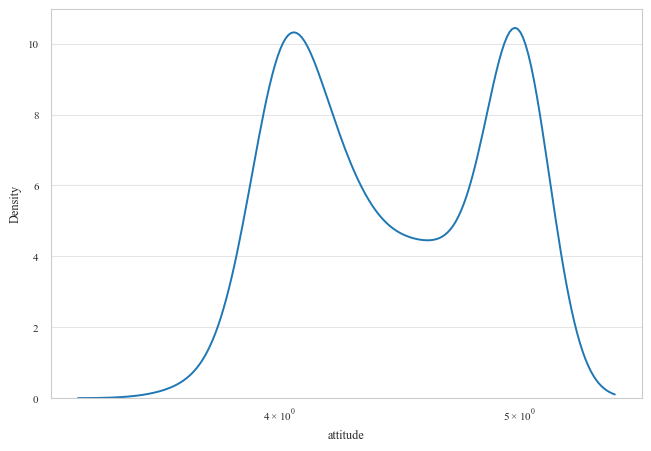

In [19]:
# Plot kde plot using sns
sns.kdeplot(data=narig_dfs['survey_df'], x='attitude' , log_scale=True)

<Axes: xlabel='knowledge', ylabel='Density'>

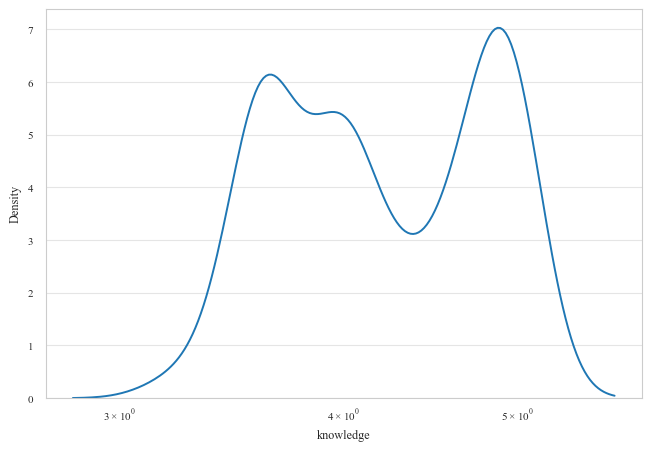

In [20]:
sns.kdeplot(data=narig_dfs['survey_df'], x='knowledge', log_scale=True)  

<Axes: xlabel='attitude', ylabel='Count'>

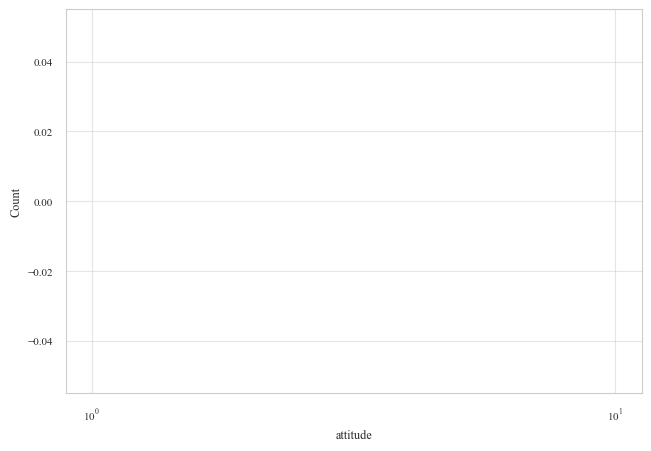

In [23]:
def arcsinsqrt(x):
    return np.arcsin(np.sqrt(x))

narig_dfs['survey_df']['attitude'] = narig_dfs['survey_df']['attitude'].apply(arcsinsqrt)

narig_dfs['survey_df']['knowledge'] = narig_dfs['survey_df']['knowledge'].apply(arcsinsqrt)

narig_dfs['survey_df']['practice'] = narig_dfs['survey_df']['practice'].apply(arcsinsqrt)

narig_dfs['survey_df']['project_performance'] = narig_dfs['survey_df']['project_performance'].apply(arcsinsqrt)

sns.histplot(data=narig_dfs['survey_df'], x='attitude', kde=True, log_scale=True) u    
